<a href="https://colab.research.google.com/github/nekochanoide/univer-11-bigdata/blob/main/hw5/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

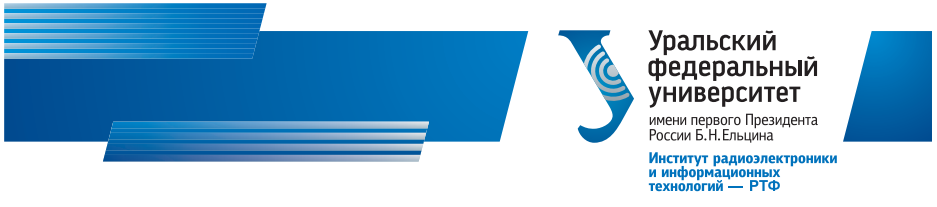


#Основы работы с Apache Spark
Изучите теоретическую часть.

In [45]:
# Устанавливаем OpenJDK
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Закачиваем Spark
!wget -q http://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz -O spark.tgz
# Распаковываем архив со Spark
!tar xf spark.tgz
# Устанавливаем пакет findspark для работы со Spark из Python
!pip install -q findspark
# Настраиваем переменные окружения для работы с Apache Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"
# Находим установку Spark
import findspark
findspark.init()
# Подключаем необходимые модули для работы со Spark из Python
from pyspark.sql import SparkSession
# Создаем сессию Spark на локальном компьютере
spark = SparkSession.builder.master("local[*]").getOrCreate()
!wget https://datahub.io/core/world-cities/r/world-cities.json -O /content/world-cities.json -q

##Задача 1
Модернизируйте заготовку заменив все участки ```<put your code here>``` на ваш код для того, что бы:
* выводить на экран схему кадра данных
* вычислять и выводить на экран в порядке убывания количества городов страны сгруппированные по стране и региону

Пример вывода на экран:
```
root
 |-- country: string (nullable = true)
 |-- geonameid: long (nullable = true)
 |-- name: string (nullable = true)
 |-- subcountry: string (nullable = true)

+--------------+----------+----+
|       country|subcountry| cnt|
+--------------+----------+----+
| United States|        51|2699|
|         India|        35|2443|
|        Brazil|        27|1200|
|        Russia|        82|1093|
|       Germany|        16|1055|
|         China|        31| 799|
|         Japan|        47| 736|
|        France|        13| 633|
|         Italy|        20| 571|
|         Spain|        19| 569|
|        Mexico|        32| 561|
|United Kingdom|         4| 513|
|   Philippines|        17| 439|
|        Turkey|        81| 383|
|     Indonesia|        35| 372|
|        Poland|        16| 327|
|      Pakistan|         6| 312|
|   Netherlands|        12| 258|
|       Ukraine|        27| 257|
|       Algeria|        47| 247|
+--------------+----------+----+
only showing top 20 rows
```

In [48]:
from pyspark.sql.functions import col #<put your code here>
df = spark.read.json("/content/world-cities.json")
#<put your code here>

In [51]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- geonameid: long (nullable = true)
 |-- name: string (nullable = true)
 |-- subcountry: string (nullable = true)



In [60]:
import pyspark.sql.functions as f

In [73]:
df.groupBy("country").agg(f.countDistinct("subcountry").alias("subcountry"), f.countDistinct("name").alias("cnt")).orderBy(f.desc("cnt")).show()

+--------------+----------+----+
|       country|subcountry| cnt|
+--------------+----------+----+
|         India|        35|2383|
| United States|        51|2365|
|        Brazil|        27|1186|
|        Russia|        82|1071|
|       Germany|        16|1051|
|         China|        31| 766|
|         Japan|        47| 722|
|        France|        13| 633|
|         Italy|        20| 571|
|         Spain|        19| 568|
|        Mexico|        32| 544|
|United Kingdom|         4| 511|
|   Philippines|        17| 418|
|        Turkey|        81| 382|
|     Indonesia|        35| 370|
|        Poland|        16| 327|
|      Pakistan|         6| 308|
|   Netherlands|        12| 258|
|       Ukraine|        27| 255|
|       Algeria|        47| 247|
+--------------+----------+----+
only showing top 20 rows

